# Understanding and cleaning the dataset

In [132]:
# Import the relevant libraries
import pandas as pd
import numpy as np
from IPython.display import display

In [133]:
# Read the file
data = pd.read_csv("telco-churn.csv")

In [134]:
# Looking at the data and knowing the columns
pd.set_option('display.max_columns', None)
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [135]:
# Checking information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the data info and column info from earlier, we can note that the Total Charges column is not considered as numerical data type. So we will fix that before moving forward.
To ease with the coding process, we will also standardize the feature names to lowercase.

In [136]:
# Standardizing the column names to lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [137]:
# Convert Total Charges to numerical data type
data.totalcharges = pd.to_numeric(data.totalcharges, errors ='coerce')

### Checking and dealing with missing values

In [138]:
# Check if there are missing values in the dataframe
data.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [139]:
# Checking the null values from totalcharges column
data[data['totalcharges'].isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [140]:
# Removing null values
data.dropna(inplace = True)

In [141]:
# Removing unnecessary columns
data.drop('customerid', axis=1, inplace=True)

In [142]:
# Show statistics 
round(data.describe(), 3)

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000,7032.000,7032.000,7032.000
mean,0.162,32.422,64.798,2283.300
std,0.369,24.545,30.086,2266.771
min,0.000,1.000,18.250,18.800
25%,0.000,9.000,35.588,401.450
50%,0.000,29.000,70.350,1397.475
75%,0.000,55.000,89.862,3794.738
max,1.000,72.000,118.750,8684.800


## Exploratory Data Analysis
1. **Response variables**
2. **Demographic Information** : gender, senior citizen, partner, dependents
3. **Service Information** : phoneservice, multiplelines, internetservice, online securtiy, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies
4. **Account Information** : tenure, contract, paperlessbilling, paymentmethod, monthlycharges, totalcharges

In [143]:
# !pip install plotly==5.10.0

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

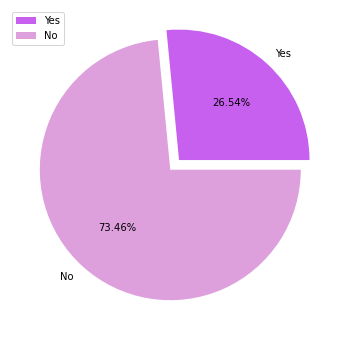

In [145]:
# Response variable
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5174]
labels = ["Yes", "No"]
explode = [0.1, 0]

plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", colors=['#C75FEF', '#DDA0DD'])
plt.legend()
plt.show()

Inferences:

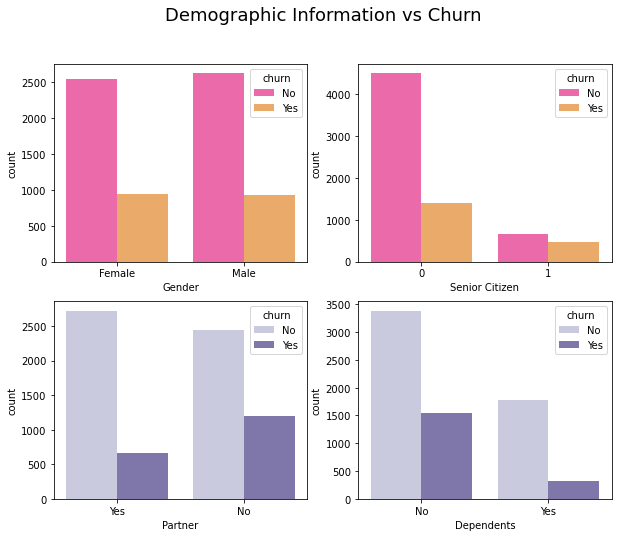

In [146]:
# Demographic Information

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
plt.suptitle('Demographic Information vs Churn', fontsize = 18)

ax1 = sns.countplot(data= data, x ='gender', hue= 'churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(data= data, x ='seniorcitizen', hue= 'churn', ax= ax[0, 1], palette= 'spring')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(data=data, x ='partner', hue= 'churn', ax= ax[1, 0], palette= 'Purples')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(data=data, x ='dependents', hue= 'churn', ax= ax[1, 1], palette= 'Purples')
ax4.set(xlabel = 'Dependents')


    
plt.show()

▶ The churn rate of senior citizens is almost double that of non-senior citizen customers. 

▶ We do not expect gender to have significant predictive power as both variables appear to be proportionate.

▶ Customers with a partner are not likely to churn as compared to those without.

▶ Customers with dependents are also not likely to churn compared to customers without dependents.

From these obeservations, it is worthe exploring alternative packages that tailor to the needs of a family household as these type of customers seem to stay with the company.

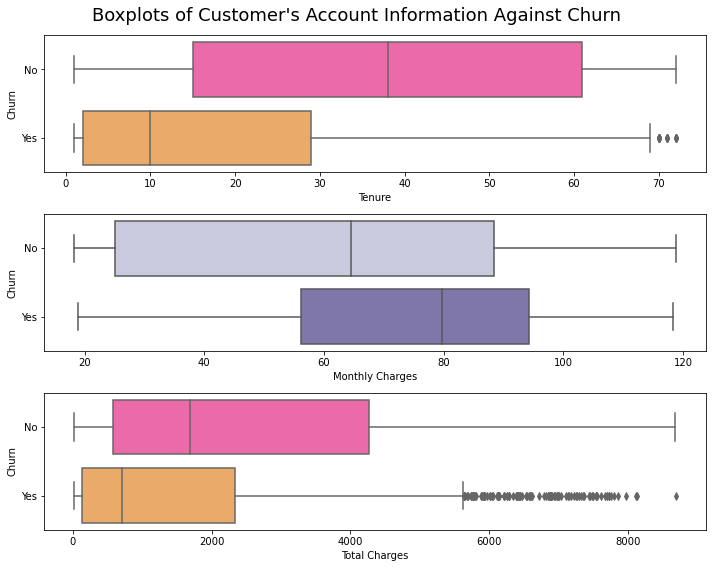

In [147]:
#Account Information

fig, ax  = plt.subplots(3, 1, figsize=(10, 8))
plt.suptitle("Boxplots of Customer's Account Information Against Churn", fontsize = 18)

ax1 = sns.boxplot(x= data['tenure'], y= data['churn'], ax= ax[0], palette= 'spring')
ax1.set(xlabel= 'Tenure' , ylabel= 'Churn')

ax2 = sns.boxplot(x= data['monthlycharges'], y= data['churn'], ax= ax[1], palette= 'Purples')
ax2.set(xlabel= 'Monthly Charges' , ylabel= 'Churn')

ax3 = sns.boxplot(x= data['totalcharges'], y= data['churn'], ax= ax[2], palette= 'spring')
ax3.set(xlabel= 'Total Charges', ylabel= 'Churn')

plt.tight_layout()
plt.show()

▶ Average period of customers who churn is 10 months. Thus, new customers (those with low tenure) are more likely to leave the company.

▶ Customers who spend around $80 per month are more likely to churn while customers who were charged below $65 monthly are to continue with the company.

▶ The customers tends to stay when their total charges are above $1500.

From these observations, we can hypothesize that most of the customers are looking for affordable telco services for the long term. More research needed to be done to properly understand the type of customers and their specific needs.

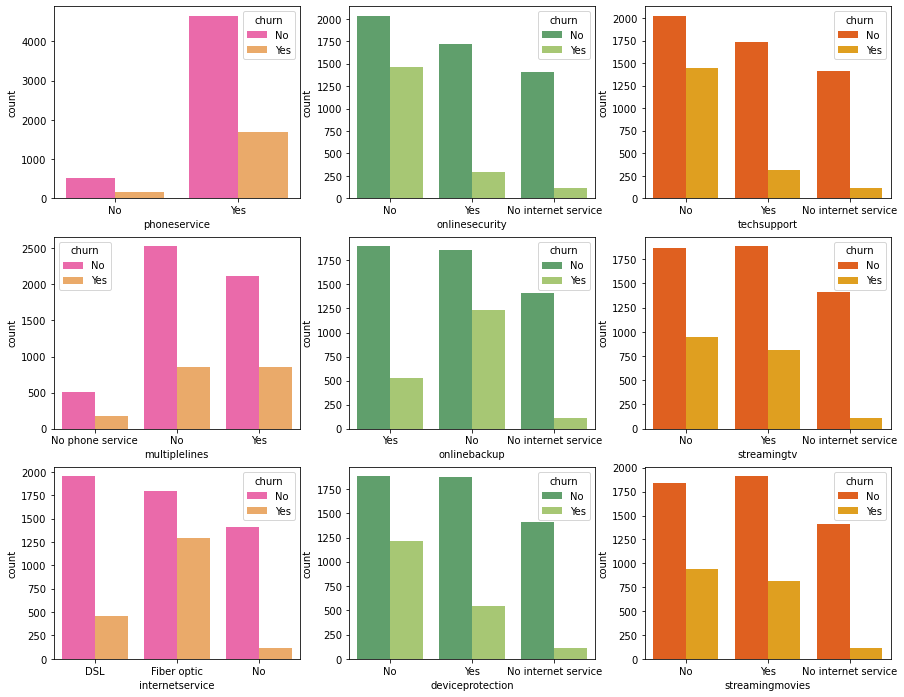

In [148]:
# Service Information
services = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 
            'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
            
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = sns.countplot(x= data[item], hue=data['churn'], ax= axes[i,0], palette= 'spring')

    elif i >=3 and i<6:
        ax = sns.countplot(x= data[item], hue=data['churn'], ax= axes[i-3,1], palette= 'summer')

    elif i < 9:
        ax = sns.countplot(x= data[item], hue=data['churn'], ax= axes[i-6,2], palette= 'autumn')

▶ It is observed that majority of the customers are retained regardless of the services that they received/subscribed.
▶ 

# Machine Learning

[Unfinished] Will update after understanding the topic better in the future.

In [149]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

### Data Preprocessing

In [150]:
# Converting the predictor variable in a binary numeric variable
data['churn'].replace(to_replace='Yes', value=1, inplace=True)
data['churn'].replace(to_replace='No',  value=0, inplace=True)

# Let's convert all the categorical variables into dummy variables
data_dummies = pd.get_dummies(data)
data_dummies.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [151]:
# Defining X and y
X = data_dummies.drop('churn', axis =1)
y = data_dummies.churn

In [152]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42, stratify=y)

In [153]:
# Feature scaling
X_scaled_train = StandardScaler().fit_transform(X_train)

X_scaled_test = StandardScaler().fit_transform(X_test)

### Model Creation

In [161]:
# KNN Classifier

# define param grid
knn_param_grid = {'n_neighbors': np.arange(1,10), 'p': [1,2],
                  'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring='roc_auc', cv=5, 
            return_train_score=True)

#fit the data to GridSearchCV
knn_grid.fit(X_train, y_train)

# show the best parameters
print("KNN Best Parameters: {}".format(knn_grid.best_params_))

#Define KNN with best estimator
knn_model = knn_grid.best_estimator_

KNN Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [156]:
# Decision Tree Classifier

# define param grid
dt_param_grid = {'max_depth': np.arange(1,10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1),
           dt_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# fit the data to GridSearch CV
dt_grid.fit(X_train, y_train)

# Show best parameters
print("Decision Tree best parameters: ",dt_grid.best_params_)

# Define Decision Tree with best estimator
dt_model = dt_grid.best_estimator_

Decision Tree best parameters:  {'max_depth': 4}


In [157]:
# Logistic Regression

# Define param grid
lr_param_grid = {'fit_intercept': [True,False],
                 'C': [0.001, 0.004, 0.01, 0.1, 1],
                 'penalty' : ['l1', 'l2']}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    lr_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
logr_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression best parameters: ",logr_grid.best_params_)

# Define Logistic Regression with best estimator
logr_model = logr_grid.best_estimator_

Logistic Regression best parameters:  {'C': 1, 'fit_intercept': False, 'penalty': 'l1'}


In [ ]:
# Polynomial Logistic Regression

# Make a polynomial pipeline
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                             MinMaxScaler(),
                             LogisticRegression())
print(poly_pipeline)

# Define param grid
pip_param_grid = {'polynomialfeatures__degree':[1,2,3],
                 'logisticregression__C':[0.01, 0.1, 0.4, 1, 5],
                 'logisticregression__penalty':['l1','l2'],
                 'logisticregression__solver':['liblinear'],
                 'logisticregression__fit_intercept':[True,False]}

pip_grid = GridSearchCV(poly_pipeline, pip_param_grid, cv=5, scoring='roc_auc', 
                        return_train_score=True)

# Fit the data to gridsearchCV
pip_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression Polynomial best parameters: ",pip_grid.best_params_)

# Define Polynomial Logistic Regression with best estimator
pip_model = pip_grid.best_estimator_

### Model Evaluation and Comparison

In [159]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc

In [162]:
print("KNN Best Train Score = ", knn_grid.best_score_)

knn_pred = knn_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, knn_pred))
print("*****************************************")
print("Knn Best model Precision score on test data = {:.2f}".format(precision_score(y_test, knn_pred)))
print("Knn Best model Recall score on test data = {:.2f}".format(recall_score(y_test, knn_pred)))
print("Knn Best model F1 score on test data = {:.2f}".format(f1_score(y_test, knn_pred)))
print("Knn Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, knn_pred)))

KNN Best Train Score =  0.7855281743987088
Knn Best model confusion matrix on test data 
 [[1137  154]
 [ 247  220]]
*****************************************
Knn Best model Precision score on test data = 0.59
Knn Best model Recall score on test data = 0.47
Knn Best model F1 score on test data = 0.52
Knn Best model Accuracy score on test data = 0.77


In [164]:
print("Decision Tree Best Train Scores: ",dt_grid.best_score_)

dt_pred = dt_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, dt_pred))
print("*****************************************")
print("DT Best model Precision score on test data = {:.2f}".format(precision_score(y_test, dt_pred)))
print("DT Best model Recall score on test data = {:.2f}".format(recall_score(y_test, dt_pred)))
print("DT Best model F1 score on test data = {:.2f}".format(f1_score(y_test, dt_pred)))
print("DT Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, dt_pred)))

Decision Tree Best Train Scores:  0.8301301372241892
Knn Best model confusion matrix on test data 
 [[1167  124]
 [ 258  209]]
*****************************************
DT Best model Precision score on test data = 0.63
DT Best model Recall score on test data = 0.45
DT Best model F1 score on test data = 0.52
DT Best model Accuracy score on test data = 0.78


In [165]:
print("Logistic Regression Best Train Scores: ",logr_grid.best_score_)

logr_pred = logr_model.predict(X_test)
print("LR Best model confusion matrix on test data \n", confusion_matrix(y_test, logr_pred))
print("*****************************************")
print("LR Best model Precision score on test data = {:.2f}".format(precision_score(y_test, logr_pred)))
print("LR Best model Recall score on test data = {:.2f}".format(recall_score(y_test, logr_pred)))
print("LR Best model F1 score on test data = {:.2f}".format(f1_score(y_test, logr_pred)))
print("LR Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, logr_pred)))

Logistic Regression Best Train Scores:  0.8462524174722719
LR Best model confusion matrix on test data 
 [[1148  143]
 [ 199  268]]
*****************************************
LR Best model Precision score on test data = 0.65
LR Best model Recall score on test data = 0.57
LR Best model F1 score on test data = 0.61
LR Best model Accuracy score on test data = 0.81
